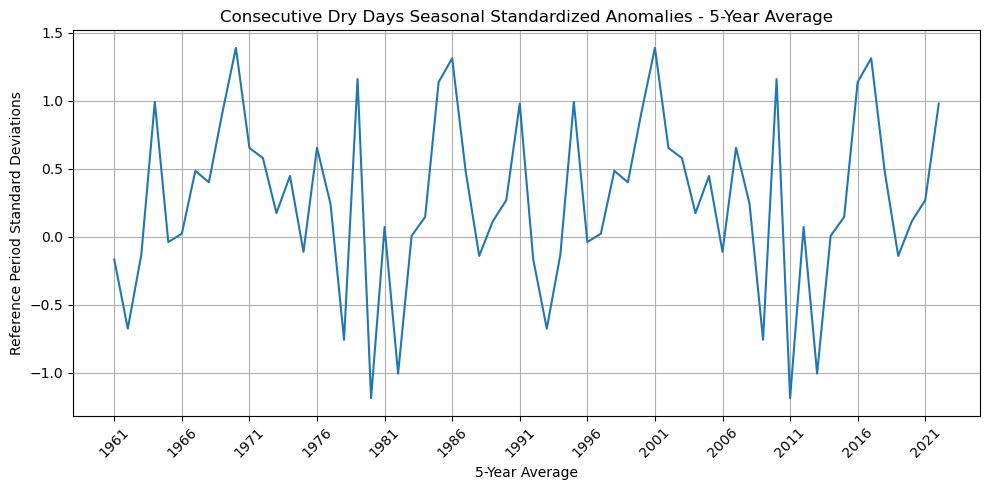

In [2]:
#  All Region combined with 5-year average from 1961 to 2021 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Reading the CDD Seasonal Dataset
data = pd.read_csv(r'C:\USD\ms-aai-500-final-project\data\Cleaned_Data_Seasonal.csv')

# Generate sample data as per your description for demonstration purposes
years = np.arange(1961, 2023)
cdd_values = np.random.randn(len(years))  # Placeholder for actual CDD values
data = pd.DataFrame({
    'Year': np.repeat(years, 4),  # Assuming 4 seasons per year
    'CDD_Seasonal_Smoothed': np.tile(cdd_values, 4)  # Repeat the same values for all seasons
})

# Calculate the 5-year rolling average, assuming the data is in chronological order
data['5_Year_Avg'] = data.groupby('Year')['CDD_Seasonal_Smoothed'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Plotting
plt.figure(figsize=(10, 5))

# Take the mean of the 5-year averages for each year to plot
yearly_avg = data.groupby('Year')['5_Year_Avg'].mean()
plt.plot(yearly_avg.index, yearly_avg.values)

plt.title('Consecutive Dry Days Seasonal Standardized Anomalies - 5-Year Average')
plt.xlabel('5-Year Average')
plt.ylabel('Reference Period Standard Deviations')

# Set x-axis to only show labels for every 5 years starting from 1961
xticks = np.arange(1961, 2022, 5)
plt.xticks(xticks, rotation=45)

plt.grid(True)
plt.tight_layout()  # Adjust layout for better fit
plt.show()